In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import time

from scipy.stats import spearmanr
from scipy.cluster import hierarchy

from fast_ml import eda
from fast_ml.utilities import display_all, reduce_memory_usage
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Dendrogram for feature selection
##### Plots Dendrogram based on Hierarchial clustering for identifying similar features .
* Input parameters:

    * df : Train dataframe 
    * variables : Important Features selcted by the model
    * method : Spearman or Pearson
        * Spearman: This correlation evaluates the monotonic relationship between two continuous or ordinal variables.
        * Pearson: This correlation evaluates the linear relationship between two continuous variables.
    

In [4]:
%time trans = pd.read_feather('tmp/train_transaction_sample')

df_size = trans.memory_usage().sum() / 1024**2
print(f'Memory usage of dataframe is {df_size} MB')
print (f'Shape of dataframe is {trans.shape}')

CPU times: user 1.27 s, sys: 1.19 s, total: 2.46 s
Wall time: 1.99 s
Memory usage of dataframe is 183.67779541015625 MB
Shape of dataframe is (200000, 394)


In [6]:
summary_df = eda.df_summary(trans)
display_all(summary_df)

,data_type,num_unique_values,sample_unique_values,num_missing,perc_missing
TransactionID,int32,200000,"[3340057, 3369734, 3462322, 2988794, 3031584, ...",0,0
isFraud,int8,2,"[0, 1]",0,0
TransactionDT,int32,198049,"[8713400, 9583269, 12275348, 139136, 1079439, ...",0,0
TransactionAmt,float16,6494,"[774.0, 29.0, 105.3125, 2182.0, 97.9375, 24.5,...",0,0
ProductCD,object,5,"[W, C, S, H, R]",0,0
card1,int16,9836,"[11596, 11919, 8406, 12570, 16085, 10532, 5772...",0,0
card2,float16,500,"[188.0, 170.0, 264.0, 462.0, 297.0, 534.0, 298...",3009,1.5045
card3,float16,94,"[150.0, 106.0, 185.0, 147.0, 143.0, 144.0, 146...",536,0.268
card4,object,4,"[visa, mastercard, discover, american express,...",539,0.2695
card5,float16,101,"[226.0, 224.0, 166.0, 117.0, 126.0, 138.0, 195...",1428,0.714


In [35]:
def variables_clustering (df, variables, method):
    """
    This function helps in performing the variable clustering.
    
    'spearman': This evaluates the monotonic relationship between two continuous or ordinal variables.
    'pearson': This evaluates the linear relationship between two continuous variables.

    
    Parameter:
    ----------
    df : dataframe
        Dataframe for analysis
    variables : list type, optional
        List of all the variables for which clustering needs to be done
        if not provided it will automatically select all the numerical analysis
    method : str, default 'spearman'
        'pearson' : For pearson correlation
        'spearman' : For spearman correlation
        
    Returns:
    --------
    Dendogram with hierarchial clustering for variables
    """
    cluster_df = df[variables]
    
    if method in ("Pearson", "pearson"):
        corr = cluster_df.corr(method='pearson')
        title = "Pearson Correlation"
        
    elif method in ("Spearman", "spearman"):
        corr = cluster_df.corr(method='spearman')
        #corr = spearmanr(cluster_df).correlation
        title = "Spearman Correlation"
        
    fig  = plt.figure(figsize=(16, int(len(variables)/2)))
    ax = fig.add_subplot(111)
    corr_linkage = hierarchy.ward(corr)
    dendro = hierarchy.dendrogram(corr_linkage, labels=variables, leaf_rotation=360, orientation ='left', ax = ax)
    dendro_idx = np.arange(0, len(dendro['ivl']))
    plt.title(title + ' - Hierarchial Clustering Dendrogram', fontsize = 17)
    ax.tick_params(axis='y', which='major', labelsize=10)
    plt.show() 

In [32]:
c_vars = ['C'+str(i) for i in range(1,15)]
v_vars = ['V'+str(i) for i in range(12,35)]
v_vars2 = ['V'+str(i) for i in range(53,75)]
c_vars.extend(v_vars)
c_vars.extend(v_vars2)

In [23]:
cluster_df = trans[c_vars]

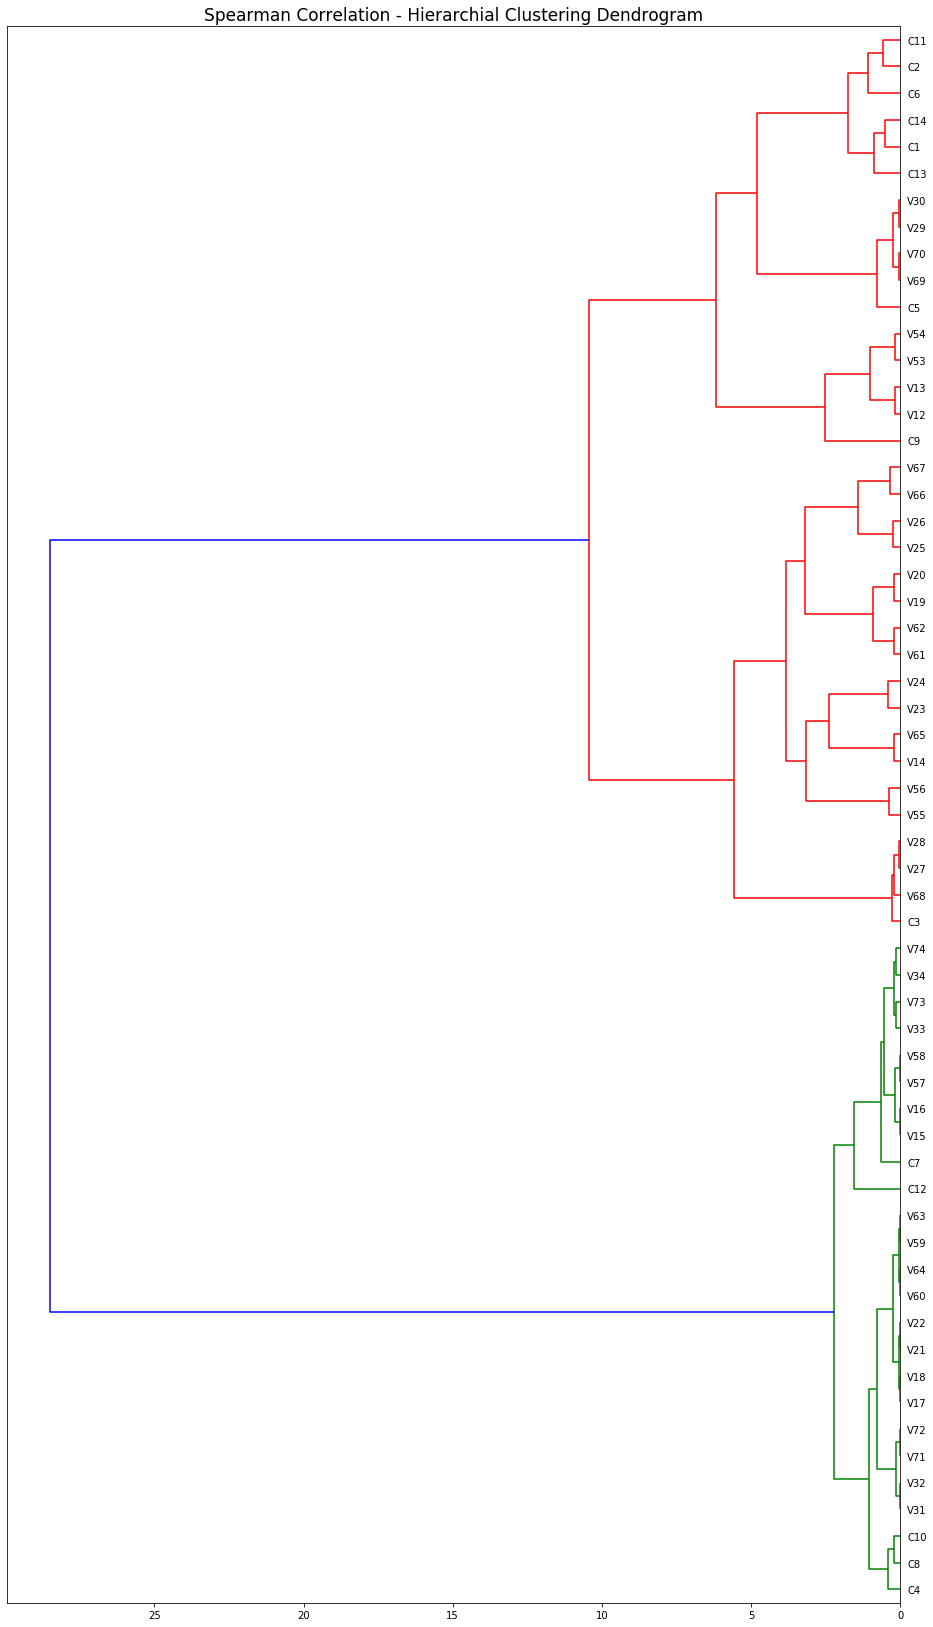

In [36]:
Cluster_dendrogram(trans, c_vars, method ='spearman')